In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import silhouette_score, roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


# Customer purchase intention inference
### Application of ML frameworks to estimate customer likelihood to make a purchase based on web page navigation.

## Viewing/Cleaning Dataset

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [17]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [18]:
df.info()
df['Revenue'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [19]:
pd.set_option('display.max_columns',None)

## Feature selection

In [20]:
df_months = pd.get_dummies(df['Month'])
df_visitor = pd.get_dummies(df['VisitorType'])
df_operatingsys = pd.get_dummies(df['OperatingSystems'], 'OS')
df_browser = pd.get_dummies(df['Browser'], 'Browser')
df_region = pd.get_dummies(df['Region'], 'Region')
df_traffictype = pd.get_dummies(df['TrafficType'], 'Traffic Type')


df = pd.concat([df, df_months, df_visitor, df_operatingsys, df_browser, df_region, df_traffictype], axis=1)
df = df.drop(columns=['Month','VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'], inplace=False)
df.shape
# df.head()

(12330, 75)

In [21]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,OS_1,OS_2,OS_3,OS_4,OS_5,OS_6,OS_7,OS_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Traffic Type_1,Traffic Type_2,Traffic Type_3,Traffic Type_4,Traffic Type_5,Traffic Type_6,Traffic Type_7,Traffic Type_8,Traffic Type_9,Traffic Type_10,Traffic Type_11,Traffic Type_12,Traffic Type_13,Traffic Type_14,Traffic Type_15,Traffic Type_16,Traffic Type_17,Traffic Type_18,Traffic Type_19,Traffic Type_20
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
scaler = StandardScaler()
X = df.drop(columns=['Revenue'], inplace=False)
X_scaled = scaler.fit_transform(X)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.6, random_state=35, shuffle=True, stratify=y)

In [23]:
model_svm = svm.SVC(class_weight='balanced')
model_gb = GradientBoostingClassifier()
model_rf = RandomForestClassifier()

# including a stratified shuffle in tran_test split because of the significantly higher proportion of False outputs compared to True outputs
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.6, random_state=35, shuffle=True, stratify=y)

print(y_test.value_counts())
print(y_train.value_counts())


Revenue
False    6253
True     1145
Name: count, dtype: int64
Revenue
False    4169
True      763
Name: count, dtype: int64


## Preliminary Algorithm Testing (SVM, Random Forest, Gradient Boosting)
### Support Vector Machine Classifier

In [24]:
model_svm.fit(X_train, y_train)
svm_is_pred = model_svm.predict(X_train)   # in-sample predictions
svm_oos_pred = model_svm.predict(X_test)   # out-of-sample predictions
print(f"in-sample confusion matrix:\n", confusion_matrix(y_train, svm_is_pred))
print(f"SVM In-Sample Metrics:\n\
        Accuracy: {accuracy_score(y_train, svm_is_pred)}\n\
        Precision Score: {precision_score(y_train, svm_is_pred)}\n\
        Recall: {recall_score(y_train, svm_is_pred)}\n\
        f1 Score: {f1_score(y_train, svm_is_pred)}")

# out-of-sample confusion matriX
print(f"out-of-sample confusion matrix:\n", confusion_matrix(y_test, svm_oos_pred))
svm_tp, svm_fp, svm_tn, svm_fn = confusion_matrix(y_test, svm_oos_pred).ravel()


svm_tnr = svm_tn/(svm_tn+svm_fp)

print(f"Support Vector Machines:\n\
        Accuracy: {accuracy_score(y_test, svm_oos_pred)}\n\
        Precision Score: {precision_score(y_test, svm_oos_pred)}\n\
        Recall: {recall_score(y_test, svm_oos_pred)}\n\
        f1 Score: {f1_score(y_test, svm_oos_pred)}\n\
        True Negative Rate: {svm_tnr}")


in-sample confusion matrix:
 [[3749  420]
 [  92  671]]
SVM In-Sample Metrics:
        Accuracy: 0.8961881589618816
        Precision Score: 0.615032080659945
        Recall: 0.8794233289646134
        f1 Score: 0.7238403451995685
out-of-sample confusion matrix:
 [[5567  686]
 [ 331  814]]
Support Vector Machines:
        Accuracy: 0.8625304136253041
        Precision Score: 0.5426666666666666
        Recall: 0.7109170305676856
        f1 Score: 0.6155009451795841
        True Negative Rate: 0.3254670599803343


### Random Forest Classifier

In [25]:
model_rf.fit(X_train, y_train)
rf_is_pred = model_rf.predict(X_train)   # in-sample predictions
rf_oos_pred = model_rf.predict(X_test)   # out-of-sample predictions
print(f"in-sample confusion matrix:\n", confusion_matrix(y_train, rf_is_pred))
print(f"Random Forest Classifier In-Sample Metrics:\n\
        Accuracy: {accuracy_score(y_train, rf_is_pred)}\n\
        Precision Score: {precision_score(y_train, rf_is_pred)}\n\
        Recall: {recall_score(y_train, rf_is_pred)}\n\
        f1 Score: {f1_score(y_train, rf_is_pred)}")

# out-of-sample confusion matrix
print(f"out-of-sample confusion matrix:\n", confusion_matrix(y_test, rf_oos_pred))
rf_tp, rf_fp, rf_tn, rf_fn = confusion_matrix(y_test, rf_oos_pred).ravel()


rf_tnr = rf_tn/(rf_tn+rf_fp)

print(f"Random Forest Classifier Metrics:\n\
        Accuracy: {accuracy_score(y_test, rf_oos_pred)}\n\
        Precision Score: {precision_score(y_test, rf_oos_pred)}\n\
        Recall: {recall_score(y_test, rf_oos_pred)}\n\
        f1 Score: {f1_score(y_test, rf_oos_pred)}\n\
        True Negative Rate: {rf_tnr}")

in-sample confusion matrix:
 [[4169    0]
 [   0  763]]
Random Forest Classifier In-Sample Metrics:
        Accuracy: 1.0
        Precision Score: 1.0
        Recall: 1.0
        f1 Score: 1.0
out-of-sample confusion matrix:
 [[6094  159]
 [ 566  579]]
Random Forest Classifier Metrics:
        Accuracy: 0.9020005406866721
        Precision Score: 0.7845528455284553
        Recall: 0.5056768558951965
        f1 Score: 0.6149761019649497
        True Negative Rate: 0.7806896551724138


### Gradient Boosting Classifier

In [26]:
model_gb.fit(X_train, y_train)
gb_is_pred = model_gb.predict(X_train)   # in-sample predictions
gb_oos_pred = model_gb.predict(X_test)   # out-of-sample predictions
print(f"in-sample confusion matrix:\n", confusion_matrix(y_train, gb_is_pred))
print(f"Gradient Boosting Classifier In-Sample Metrics:\n\
        Accuracy: {accuracy_score(y_train, gb_is_pred)}\n\
        Precision Score: {precision_score(y_train, gb_is_pred)}\n\
        Recall: {recall_score(y_train, gb_is_pred)}\n\
        f1 Score: {f1_score(y_train, gb_is_pred)}")

# out-of-sample confusion matriX
print(f"out-of-sample confusion matrix:\n", confusion_matrix(y_test, gb_oos_pred))
gb_tp, gb_fp, gb_tn, gb_fn = confusion_matrix(y_test, gb_oos_pred).ravel()


gb_tnr = gb_tn/(gb_tn+gb_fp)

print(f"Gradient Boosting Classifier Metrics:\n\
        Accuracy: {accuracy_score(y_test, gb_oos_pred)}\n\
        Precision Score: {precision_score(y_test, gb_oos_pred)}\n\
        Recall: {recall_score(y_test, gb_oos_pred)}\n\
        f1 Score: {f1_score(y_test, gb_oos_pred)}\n\
        True Negative Rate: {gb_tnr}")

in-sample confusion matrix:
 [[4064  105]
 [ 242  521]]
Gradient Boosting Classifier In-Sample Metrics:
        Accuracy: 0.9296431467964315
        Precision Score: 0.8322683706070287
        Recall: 0.6828309305373526
        f1 Score: 0.750179985601152
out-of-sample confusion matrix:
 [[6009  244]
 [ 442  703]]
Gradient Boosting Classifier Metrics:
        Accuracy: 0.907272235739389
        Precision Score: 0.7423442449841605
        Recall: 0.6139737991266375
        f1 Score: 0.6720841300191205
        True Negative Rate: 0.6443148688046647


### Model Metrics comparison


In [27]:
print(f"Support Vector Machines Classifier Metrics:\n\
        Accuracy: {accuracy_score(y_test, svm_oos_pred)}\n\
        Precision Score: {precision_score(y_test, svm_oos_pred)}\n\
        Recall: {recall_score(y_test, svm_oos_pred)}\n\
        f1 Score: {f1_score(y_test, svm_oos_pred)}\n\
        True Negative Rate: {svm_tnr}\n\n")

print(f"Random Forest Classifier Metrics:\n\
        Accuracy: {accuracy_score(y_test, rf_oos_pred)}\n\
        Precision Score: {precision_score(y_test, rf_oos_pred)}\n\
        Recall: {recall_score(y_test, rf_oos_pred)}\n\
        f1 Score: {f1_score(y_test, rf_oos_pred)}\n\
        True Negative Rate: {rf_tnr}\n\n")

print(f"Gradient Boosting Classifier Metrics:\n\
        Accuracy: {accuracy_score(y_test, gb_oos_pred)}\n\
        Precision Score: {precision_score(y_test, gb_oos_pred)}\n\
        Recall: {recall_score(y_test, gb_oos_pred)}\n\
        f1 Score: {f1_score(y_test, gb_oos_pred)}\n\
        True Negative Rate: {gb_tnr}")


Support Vector Machines Classifier Metrics:
        Accuracy: 0.8625304136253041
        Precision Score: 0.5426666666666666
        Recall: 0.7109170305676856
        f1 Score: 0.6155009451795841
        True Negative Rate: 0.3254670599803343


Random Forest Classifier Metrics:
        Accuracy: 0.9020005406866721
        Precision Score: 0.7845528455284553
        Recall: 0.5056768558951965
        f1 Score: 0.6149761019649497
        True Negative Rate: 0.7806896551724138


Gradient Boosting Classifier Metrics:
        Accuracy: 0.907272235739389
        Precision Score: 0.7423442449841605
        Recall: 0.6139737991266375
        f1 Score: 0.6720841300191205
        True Negative Rate: 0.6443148688046647


<p> Random Forest and Gradient Boosting Classifiers perform better than Support Vector Machines based on out of sample metrics, and will be further considered. </p>
<p>There appears to be a balancing issue occurring as indicated by the recall, f1, and precision scores. This could be improved by revisiting stratified sampling.</p>



## Under/Overfitting of better 2 algorithms (Random Forest and Gradient Boosting)


In [28]:
print(f'Random Forest\n')
print(f"in-sample confusion matrix:\n", confusion_matrix(y_train, gb_is_pred))
print(f"Random Forest Classifier In-Sample Metrics:\n\
        Accuracy: {accuracy_score(y_train, rf_is_pred)}\n\
        Precision Score: {precision_score(y_train, rf_is_pred)}\n\
        Recall: {recall_score(y_train, rf_is_pred)}\n\
        f1 Score: {f1_score(y_train, rf_is_pred)}\n\n")

# out-of-sample confusion matrix
print(f"out-of-sample confusion matrix:\n", confusion_matrix(y_test, rf_oos_pred))
rf_tp, rf_fp, rf_tn, rf_fn = confusion_matrix(y_test, rf_oos_pred).ravel()


rf_tnr = rf_tn/(rf_tn+rf_fp)

print(f"Random Forest Classifier Metrics:\n\
        Accuracy: {accuracy_score(y_test, rf_oos_pred)}\n\
        Precision Score: {precision_score(y_test, rf_oos_pred)}\n\
        Recall: {recall_score(y_test, rf_oos_pred)}\n\
        f1 Score: {f1_score(y_test, rf_oos_pred)}\n\
        True Negative Rate: {rf_tnr}\n\
-------------------------------------------------\n")


print(f"in-sample confusion matrix:\n", confusion_matrix(y_train, gb_is_pred))
print(f"Gradient Boosting Classifier In-Sample Metrics:\n\
        Accuracy: {accuracy_score(y_train, gb_is_pred)}\n\
        Precision Score: {precision_score(y_train, gb_is_pred)}\n\
        Recall: {recall_score(y_train, gb_is_pred)}\n\
        f1 Score: {f1_score(y_train, gb_is_pred)}\n\n")

# out-of-sample confusion matriX
print(f"out-of-sample confusion matrix:\n", confusion_matrix(y_test, gb_oos_pred))
gb_tp, gb_fp, gb_tn, gb_fn = confusion_matrix(y_test, gb_oos_pred).ravel()


gb_tnr = gb_tn/(gb_tn+gb_fp)

print(f"Gradient Boosting Classifier Metrics:\n\
        Accuracy: {accuracy_score(y_test, gb_oos_pred)}\n\
        Precision Score: {precision_score(y_test, gb_oos_pred)}\n\
        Recall: {recall_score(y_test, gb_oos_pred)}\n\
        f1 Score: {f1_score(y_test, gb_oos_pred)}\n\
        True Negative Rate: {gb_tnr}")

Random Forest

in-sample confusion matrix:
 [[4064  105]
 [ 242  521]]
Random Forest Classifier In-Sample Metrics:
        Accuracy: 1.0
        Precision Score: 1.0
        Recall: 1.0
        f1 Score: 1.0


out-of-sample confusion matrix:
 [[6094  159]
 [ 566  579]]
Random Forest Classifier Metrics:
        Accuracy: 0.9020005406866721
        Precision Score: 0.7845528455284553
        Recall: 0.5056768558951965
        f1 Score: 0.6149761019649497
        True Negative Rate: 0.7806896551724138
-------------------------------------------------

in-sample confusion matrix:
 [[4064  105]
 [ 242  521]]
Gradient Boosting Classifier In-Sample Metrics:
        Accuracy: 0.9296431467964315
        Precision Score: 0.8322683706070287
        Recall: 0.6828309305373526
        f1 Score: 0.750179985601152


out-of-sample confusion matrix:
 [[6009  244]
 [ 442  703]]
Gradient Boosting Classifier Metrics:
        Accuracy: 0.907272235739389
        Precision Score: 0.7423442449841605
        R

<p>Random Forest and Gradient Boosting models both see in sample accuracy that is higher than out of sample accuracy.</p>
<p>The Random Forest model's in-sample metrics would indicate that the model is overfitting to the training data; though the model still appears to perform decently on out-of-sample data. </p>
<p>Gradient boosting is closer between in- and out-of-sample performance  potentially leaving room to improve both in- and out-of-sample metrics by further tuning the model hyperparameters. The model also has a slightly higher out-of-sample accuracy than the random forest model, meaning that, tuning hyperparameters may improve our gradient boosting model beyond the random forest model.</p>

## Model hyperparameter tuning
#### Model default parameters

Random Forest Classifier
| Parameter | Value |
| :---      | :---: |
| n_estimators | 100|
| criterion | gini  |
| max_depth | None  |
| min_samples_split | 2 |
| min_samples_leaf | 1 |
| min_weight_fraction_leaf | 0.0 |
| max_features | sqrt |
| max_leaf_nodes | None |
| min_impurity_decrease| 0.0 |
| bootstrap | True |
| oob_score | False |
| n_jobs    | None  |
| random_state  | None |
| verbose | 0 | 
| warm_start | False | 
| class_weight | None |
|ccp_alpha | 0.0 |
|max_samples | None |

Gradient Boosting Classifier
| Parameter | Value |
| :---      | :---: |
| loss | log_loss   |
| learning_rate | 0.1 |
| n_estimators | 100  |
| sumbsample | 0.1 |
| criterion | friedman_mse |
| min_samples_leaf | 1 |
| min_weight_fraction_leaf | 0.0 |
| max_depth | 3 |
| min_impurity_decrease| 0.0 |
| init | None |
| random_state | None |
| max_features  | None  |
| verbose | 0 | 
| max_leaf_nodes | None | 
| warm_start | False |
|validation_fraction | 0.1 |
|n_iter_no_change | None |
| tol   | 1e-4  |
| ccp_alpha | 0.0   |


<p>The parameter grids below were selected based on the potential effects on overfitting that they may have. This is significant particularly for the Random Forest model, which initially was seeing perfect fitting based on in-sample metrics, but still providing decent out-of-sample metrics. I have included default parameters, but have also provided smaller upper limits to parameters such as max depth or n_estimators in hopes of reducing overfitting, as well as higher lower bounds for parameters suchg as min samples leaf which would also potentially reduce overfitting. </p>
<p>In the case of the Gradient Boosting, I aimed to improve both in- and out-of-sample accuracy in an effort to maximize model performance. This involved a similar approach to parameter selection for the Random Forest Model, but providing values which would potentially increase in-sample accuracy. While this could potntially lead to more overfitting, my goal is to see increases on both sides of model performance.</p>


In [29]:
rf_param_grid = {
    'n_estimators':[25, 50, 75, 100],
    'max_depth': [6, 8, 10, 12, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy']
}

gb_param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.5, 0.75],
    'n_estimators': [ 50, 75, 150],
    'min_samples_leaf': [1, 5, 10, 15],
    'max_depth': [4, 5, 7, None],

}


In [30]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=35), param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=35), param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=1)

In [31]:
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=35), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [25, 50, 75, 100]},
             verbose=1)

In [32]:
gb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=35),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.75],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [4, 5, 7, None],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'n_estimators': [50, 75, 150]},
             verbose=1)

In [33]:
best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

In [34]:
best_gb_params = gb_grid_search.best_params_
best_gb_model = gb_grid_search.best_estimator_

In [35]:
isrfpred = best_rf_model.predict(X_train)
rfgspred = best_rf_model.predict(X_test)
rfisaccuracy = accuracy_score(y_train,isrfpred)
rfaccuracy = accuracy_score(y_test, rfgspred)

isgbpred = best_gb_model.predict(X_train)
gbgspred = best_gb_model.predict(X_test)
gbisaccuracy = accuracy_score(y_train,isgbpred)
gbaccuracy = accuracy_score(y_test, gbgspred)


print("Bests Random Forest Params", best_rf_params)
print("Random Forest Train Set Accuracy", rfisaccuracy)
print("Random Forest Test Set Accuracy", rfaccuracy, f'\n')

print("Bests Gradient Boosting Params", best_gb_params)
print("Random Forest Train Set Accuracy", gbisaccuracy)
print("Random Forest Test Set Accuracy", gbaccuracy)

Bests Random Forest Params {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 75}
Random Forest Train Set Accuracy 0.9916869424168694
Random Forest Test Set Accuracy 0.9017301973506353 

Bests Gradient Boosting Params {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}
Random Forest Train Set Accuracy 0.9442416869424168
Random Forest Test Set Accuracy 0.9047039740470397


<p>After applying a grid search of best hyperparameters for the random forest and gradient boosting classifier models, it appears that the gradient boosting model is performing slightly better based on out of sample accuracy. Both models are scoring at or above 90% accuracy for both in-and out-of-sample data sets, indicating that there is likely no over-fitting occurring, and while the models may be able to improve further, this may require significantly more time in further testing hyperparameters.</p>

## Cross-Validation of better performing algorithm - Gradient Boosting Classifier


In [36]:
scoring = {'accuracy':'accuracy',
           'precision':'precision',
           'recall':'recall',
           'f1':'f1'} 
scores = cross_validate(best_gb_model, X_scaled,y, cv=5, scoring=scoring)

print(f"Cross-Validated Gradient Boosting Classifier Metrics: \n\
        Accuracy for each fold: \n\t{scores['test_accuracy']}\n\
        Precision for each fold: \n\t{scores['test_precision']}\n\
        Recall for each fold: \n\t{scores['test_recall']}\n\
        F1 score for each fold: \n\t{scores['test_f1']}\n\n")
print(f"Average Metrics: \n\
        Average Accuracy: {scores['test_accuracy'].mean()}\n\
        Average Precision: {scores['test_precision'].mean()}\n\
        Average Recall: {scores['test_recall'].mean()}\n\
        Average F1 score: {scores['test_f1'].mean()}\n\n")

Cross-Validated Gradient Boosting Classifier Metrics: 
        Accuracy for each fold: 
	[0.92254663 0.91240876 0.89578264 0.88442822 0.88240065]
        Precision for each fold: 
	[0.85984848 0.78546713 0.67605634 0.66329966 0.6299435 ]
        Recall for each fold: 
	[0.59580052 0.59580052 0.62827225 0.51570681 0.58376963]
        F1 score for each fold: 
	[0.70387597 0.67761194 0.65128901 0.5802651  0.60597826]


Average Metrics: 
        Average Accuracy: 0.8995133819951338
        Average Precision: 0.7229230234057716
        Average Recall: 0.5838699481936486
        Average F1 score: 0.6438040550774599




This slight decrease in performance when cross validating the "best" model compared to previous runs indicates that the model may have infact been overfitting to the training data.  

## Cluster Model training

In [50]:
C = pd.read_csv('online_shoppers_intention.csv')
C.head()
C_months = pd.get_dummies(C['Month'])
C_visitor = pd.get_dummies(C['VisitorType'])
C_operatingsys = pd.get_dummies(C['OperatingSystems'], 'OS')
C_browser = pd.get_dummies(C['Browser'], 'Browser')
C_region = pd.get_dummies(C['Region'], 'Region')
C_traffictype = pd.get_dummies(C['TrafficType'], 'Traffic Type')


C = pd.concat([C, C_months, C_visitor, C_operatingsys, C_browser, C_region, C_traffictype], axis=1)
C = C.drop(columns=['Month','VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'], inplace=False)
C.shape


(12330, 75)

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


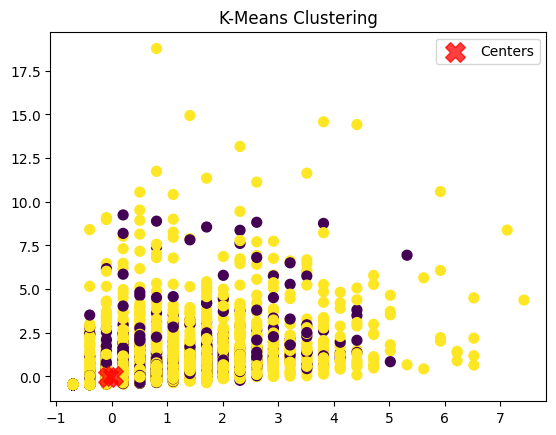

0.09185975054073912


In [51]:

cluster_x = scaler.fit_transform(C)
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=35)
kmeans.fit(cluster_x)
sil_score = silhouette_score(cluster_x, kmeans.labels_)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cluster_x[:, 0], cluster_x[:,1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1] , c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
print(sil_score)

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


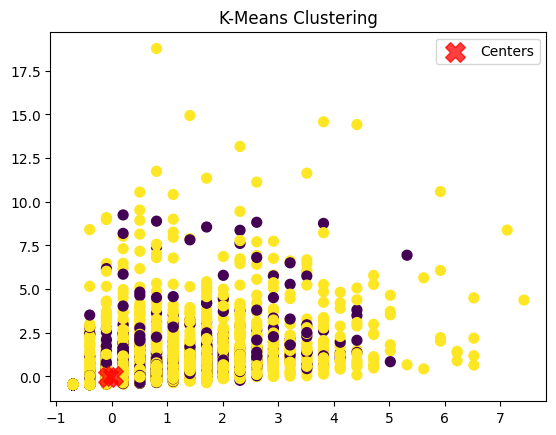

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


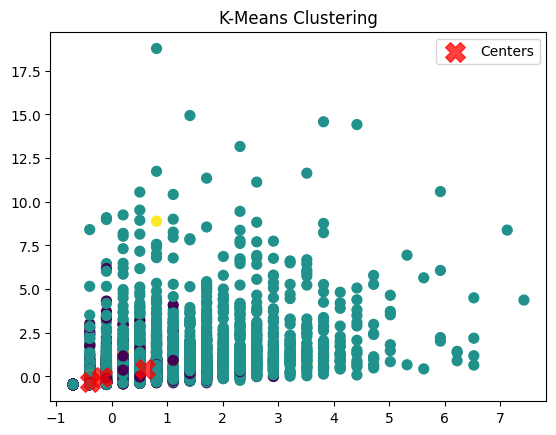

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


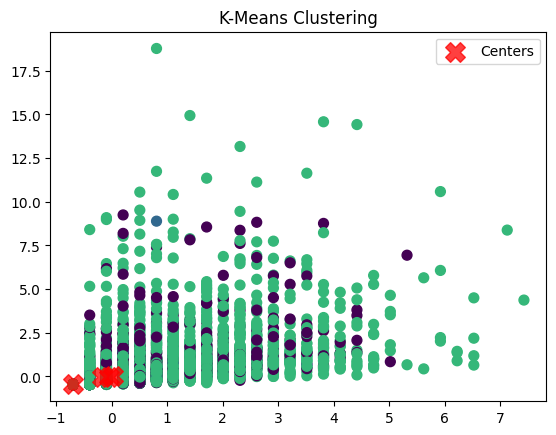

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


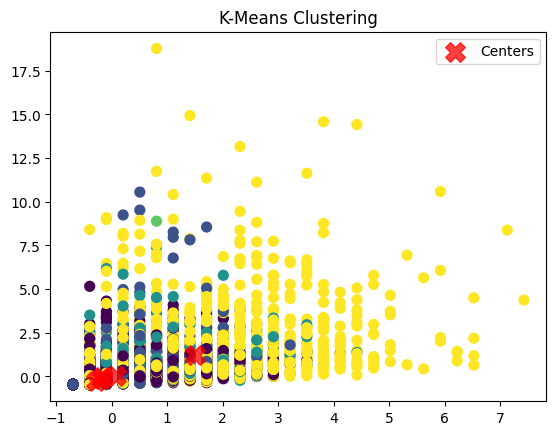

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


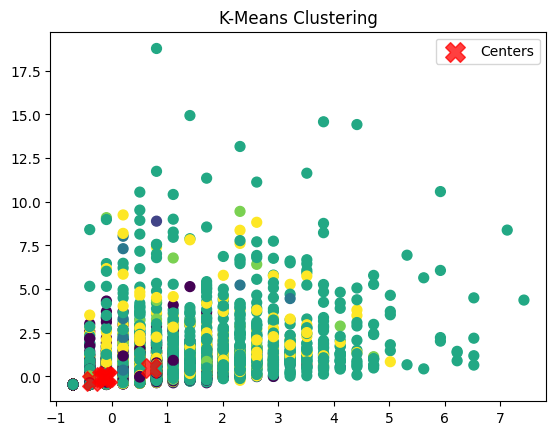

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


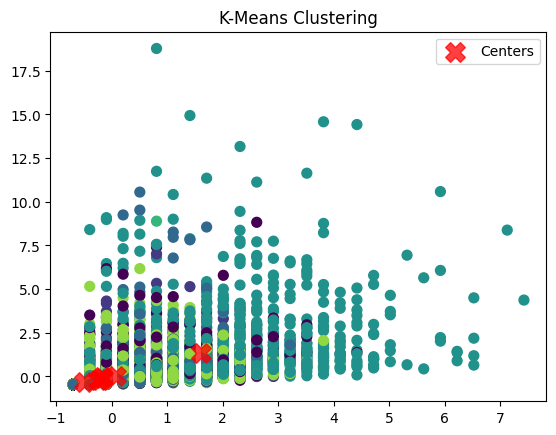

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


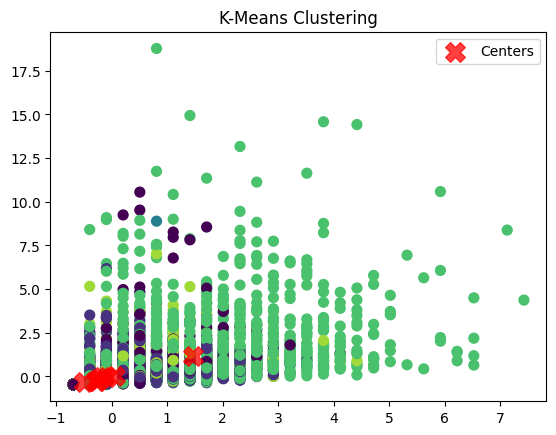

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


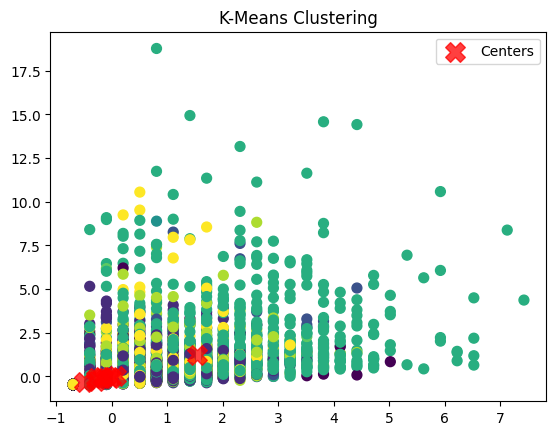

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


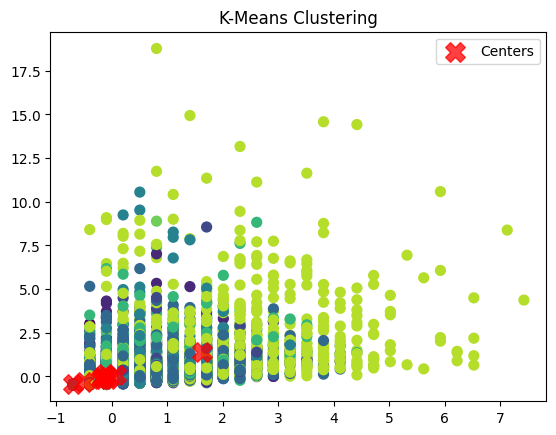

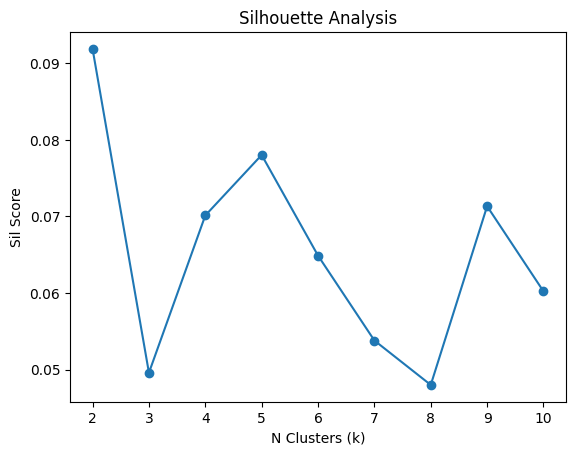

In [66]:

sil_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=35)
    kmeans.fit(cluster_x)
    score = silhouette_score(cluster_x, kmeans.labels_)
    sil_scores.append(score)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    plt.scatter(cluster_x[:, 0], cluster_x[:,1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:,0], centroids[:,1] , c='red', s=200, alpha=0.75, marker='X', label='Centers')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel('N Clusters (k)')
plt.ylabel('Sil Score')
plt.title('Silhouette Analysis')
plt.show()

### Hierarchical clustering
Because the dataset does not have identifying information like the data for the exercise in week 7's homework, I will identify a row by its index. For this exercise, the index used will be 1500.

In [53]:
# training another clustering model using the n_clusters with the highest silhouette score (4 clusters)
copy_C = C.copy()
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=35)
kmeans_4.fit(cluster_x)
labels_4 = kmeans_4.labels_
copy_C['cluster'] = labels_4
copy_C.head()

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,OS_1,OS_2,OS_3,OS_4,OS_5,OS_6,OS_7,OS_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Traffic Type_1,Traffic Type_2,Traffic Type_3,Traffic Type_4,Traffic Type_5,Traffic Type_6,Traffic Type_7,Traffic Type_8,Traffic Type_9,Traffic Type_10,Traffic Type_11,Traffic Type_12,Traffic Type_13,Traffic Type_14,Traffic Type_15,Traffic Type_16,Traffic Type_17,Traffic Type_18,Traffic Type_19,Traffic Type_20,cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2


In [54]:
target_index = 1500
target_cluster = copy_C.loc[target_index]['cluster']
print(f'The cluster for row at index {target_index} is {target_cluster}')

The cluster for row at index 1500 is 2


In [55]:
hier_C = copy_C[copy_C['cluster']==target_cluster]
hier_C.drop(columns='cluster', inplace=False)
scaled_hier_C = scaler.fit_transform(hier_C)

In [56]:
hier_sil_scores = {}
for k in range(2, 15):
    hier_kmeans = KMeans(n_clusters=k, init='k-means++', random_state=35)
    hier_kmeans.fit(scaled_hier_C)
    hier_labels = hier_kmeans.labels_
    hier_cen = hier_kmeans.cluster_centers_
    hier_C['cluster'] = hier_labels
    hier_score = silhouette_score(scaled_hier_C, hier_labels)
    hier_sil_scores[k] = hier_score


c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emays\AppData\Local\Temp\ipykernel_28296\5826028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hier_C['cluster'] = hier_labels
c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\U

### Analysis of Silhouette scores of hierarchical clustering using N clusters.

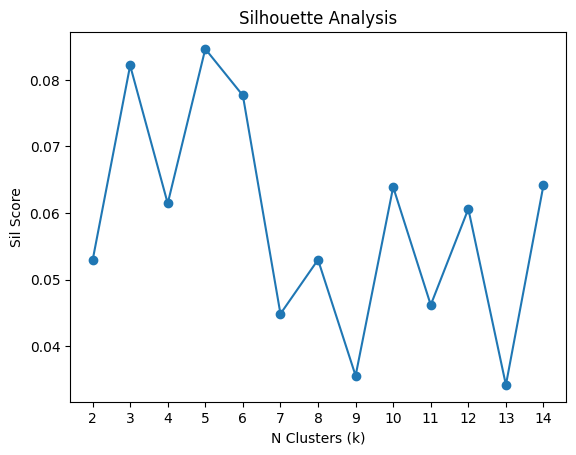

The Silhouette score for the best n clusters for our hierarchical clustering model is 0.08463716636116611 using 5 clusters


In [57]:
plt.plot(hier_sil_scores.keys(), hier_sil_scores.values(), marker='o')
plt.xlabel('N Clusters (k)')
plt.xticks(range(2,15))
plt.ylabel('Sil Score')
plt.title('Silhouette Analysis')
plt.show()
# highest_sil_score = max(hier_sil_scores.values())
best_hier_clusters, highest_sil_score = max(hier_sil_scores.items(), key=lambda k: k[1])
print(f'The Silhouette score for the best n clusters for our hierarchical clustering model is {highest_sil_score} using {best_hier_clusters} clusters')


##### It is found that, when clustering the rows that belong in the same cluster as our target sample (index 1500), the best clustering model by silhouette score uses 5 clusters, achieving a sil score of approximately 0.085, indicating that the overall performance of the clustering model at its best is not particulary good, seeing the data charted below, it could be inferred that this particular dataset may not be ideal as a use case for clustering.

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emays\AppData\Local\Temp\ipykernel_28296\486007949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hier_C['cluster'] = hier_labels


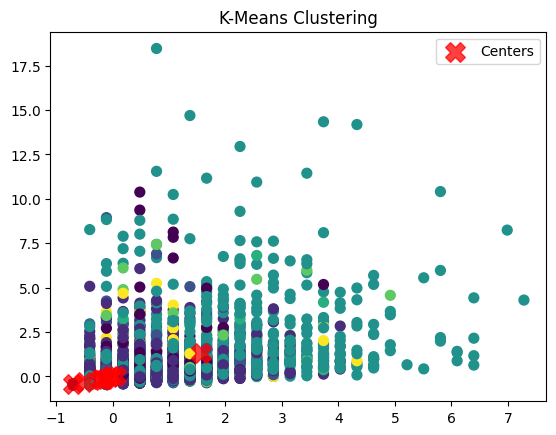

In [58]:
hier_kmeans = KMeans(n_clusters=9, init='k-means++', random_state=35)
hier_kmeans.fit(scaled_hier_C)
hier_labels = hier_kmeans.labels_
hier_cen = hier_kmeans.cluster_centers_
hier_C['cluster'] = hier_labels

plt.scatter(scaled_hier_C[:, 0], scaled_hier_C[:,1], c=hier_labels, s=50, cmap='viridis')
plt.scatter(hier_cen[:,0], hier_cen[:,1] , c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

### Exploration of Primary Component Analysis for feature selection to improve kmeans clustering
I just got curious about this method when looking at methods for feature selection, and thought I'd try my hand at applying PCA selected features to our kmeans clustering problem.

In [59]:
scaled_C = scaler.fit_transform(C)
pca = PCA()
C_pca = pca.fit(C)
print(C_pca.explained_variance_ratio_,
C_pca.explained_variance_ratio_.shape)

[9.87741151e-01 7.54401204e-03 4.48203272e-03 1.37699938e-04
 9.21368572e-05 1.62776884e-06 2.37557717e-07 1.42807896e-07
 9.10416806e-08 8.49429298e-08 7.81813837e-08 7.00052889e-08
 5.48915369e-08 5.02504411e-08 4.77960467e-08 4.21570754e-08
 3.96915871e-08 3.75852391e-08 3.08450725e-08 2.66068960e-08
 2.50390867e-08 2.46164500e-08 2.03184630e-08 1.90252453e-08
 1.73044492e-08 1.64965053e-08 1.46497074e-08 1.30463454e-08
 1.22410179e-08 1.17684576e-08 1.09546292e-08 1.01349172e-08
 9.59044268e-09 9.38979163e-09 9.12688347e-09 8.09394359e-09
 7.88429471e-09 7.31790900e-09 7.11127754e-09 6.61631404e-09
 6.33569627e-09 5.50570078e-09 5.37770482e-09 4.81051878e-09
 4.02607812e-09 3.62584386e-09 2.50077743e-09 2.46027662e-09
 2.00297041e-09 1.15977027e-09 1.08373244e-09 9.76344633e-10
 8.78816743e-10 8.69440114e-10 8.21178065e-10 4.97791136e-10
 3.95742033e-10 3.38843732e-10 3.22352151e-10 2.64418297e-10
 2.30368878e-10 2.26288038e-10 1.68322667e-10 6.89930727e-11
 4.78838706e-11 2.406729

Text(0, 0.5, 'Cumulative Explained Variance')

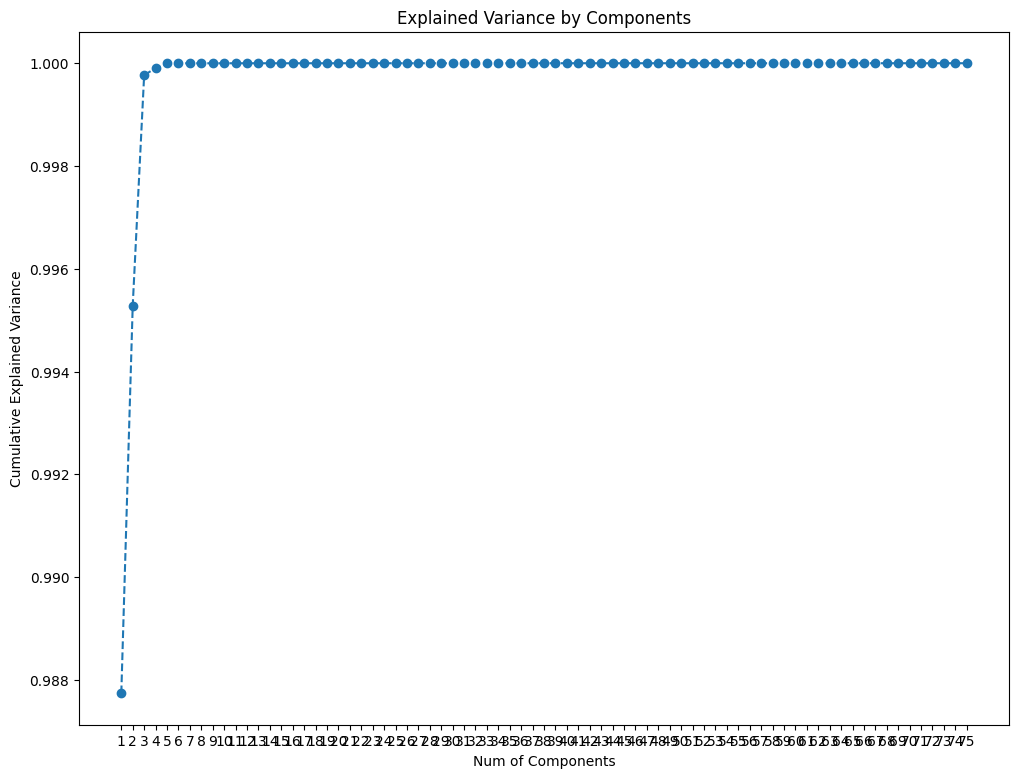

In [62]:
plt.figure(figsize=(12,9))
plt.plot(range(1,76), C_pca.explained_variance_ratio_.cumsum(), marker='o', linestyle= '--')
plt.title('Explained Variance by Components')
plt.xlabel('Num of Components')
plt.xticks(range(1,76))
plt.ylabel('Cumulative Explained Variance')


In [63]:
pca3 = PCA(n_components=3)
pca3.fit(C)

scores_pca3 = pca3.transform(C)
# scores_pca3.shape
print(scores_pca3)

[[-1197.63572016   -40.82436252     7.03576017]
 [-1133.68453223   -43.29121079     5.9949907 ]
 [-1197.63572579   -40.82444477     7.03572348]
 ...
 [-1013.48407897   -47.93984362     4.02738168]
 [ -849.24600244    18.23964767   -17.97677242]
 [-1176.36855995   -41.65379835     6.68136702]]


c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


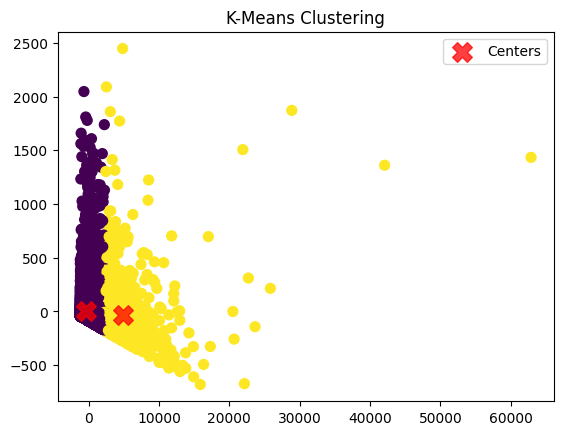

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


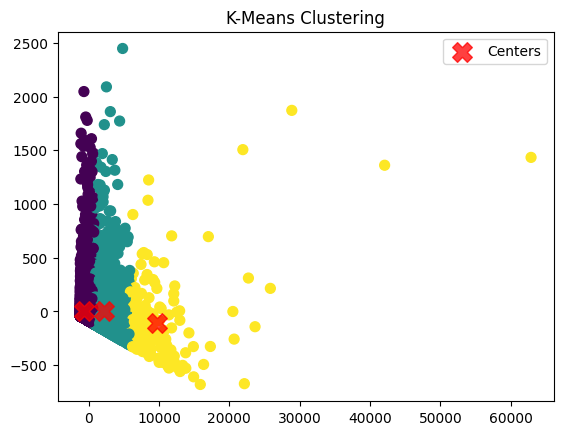

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


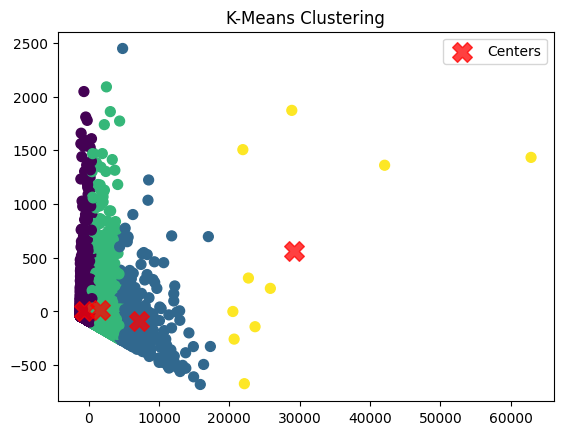

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


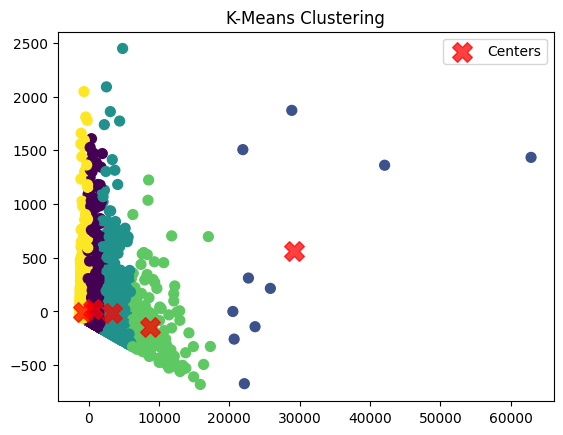

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


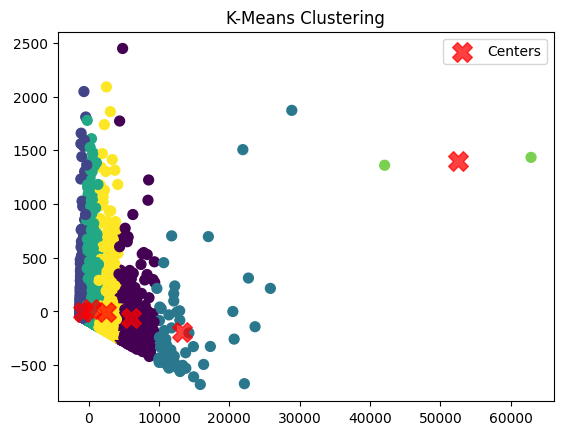

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


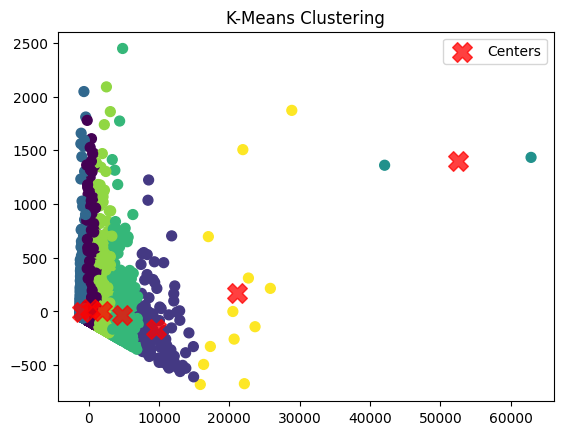

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


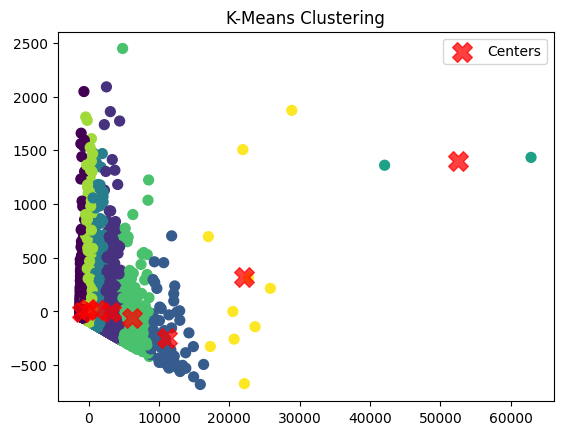

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


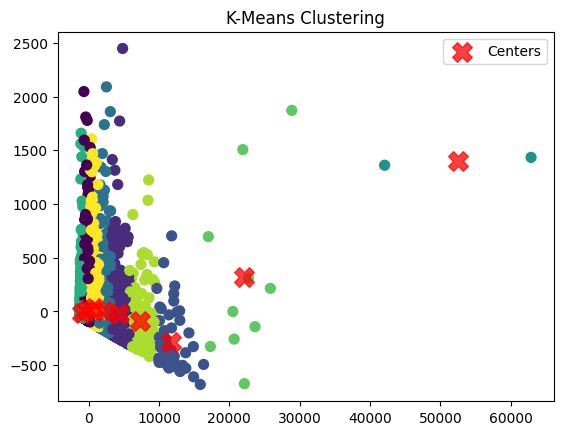

c:\Users\emays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


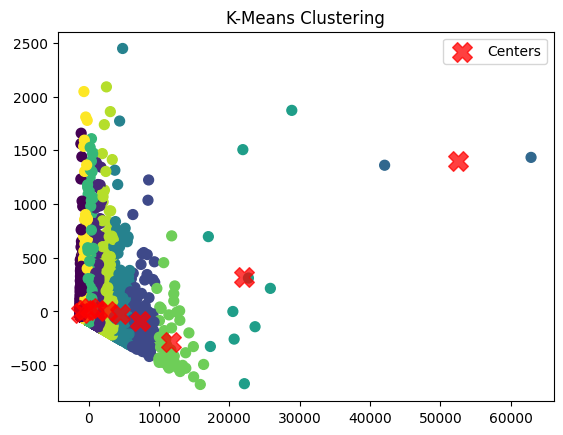

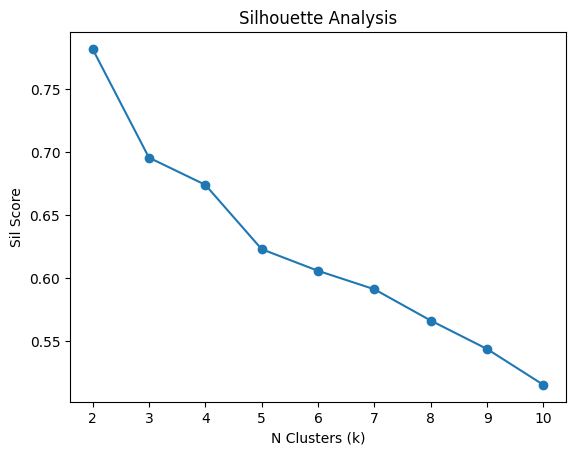

In [65]:

sil_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=35)
    kmeans.fit(scores_pca3)
    score = silhouette_score(scores_pca3, kmeans.labels_)
    sil_scores.append(score)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    plt.scatter(scores_pca3[:, 0], scores_pca3[:,1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:,0], centroids[:,1] , c='red', s=200, alpha=0.75, marker='X', label='Centers')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel('N Clusters (k)')
plt.ylabel('Sil Score')
plt.title('Silhouette Analysis')
plt.show()